In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from IPython import display

%matplotlib inline

In [2]:
best_in_show = pd.read_csv('best_in_show.csv')

In [3]:
best_in_show.head()

,Dog breed,Unnamed: 1,category,Unnamed: 3,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,Unnamed: 9,...,Unnamed: 59,"Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,NaN,American Kennel Club group,NaN,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",NaN,...,NaN,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,NaN,herding,NaN,3.64,45,39,"$20,143",48%,NaN,...,NaN,"13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,NaN,terrier,NaN,3.61,80,61,"$22,638",14%,NaN,...,NaN,"14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,NaN,sporting,NaN,3.54,30,30,"$22,589",16%,NaN,...,NaN,"13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,NaN,terrier,NaN,3.53,59,48,"$21,992",22%,NaN,...,NaN,"14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [4]:
best_in_show.describe()

,Unnamed: 1,Unnamed: 3,datadog score,Unnamed: 9,Unnamed: 24,ULTIMATE TOP DATA DOG MEGA RANKING - without kids,ULTIMATE TOP DATA DOG MEGA RANKING - with kids,Unnamed: 30,Unnamed: 36,Unnamed: 46,Unnamed: 59,"total, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £"
count,0.0,0.0,87.000000,0.0,0.0,87.000000,87.000000,0.0,0.0,0.0,0.0,172.0,172.0,172.0,172.0,172.0
mean,NaN,NaN,2.603678,NaN,NaN,43.954023,43.942529,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0
std,NaN,NaN,0.570288,NaN,NaN,25.288065,25.278153,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,0.990000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0
25%,NaN,NaN,2.185000,NaN,NaN,22.500000,22.500000,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0
50%,NaN,NaN,2.710000,NaN,NaN,44.000000,44.000000,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0
75%,NaN,NaN,3.035000,NaN,NaN,65.500000,65.500000,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0
max,NaN,NaN,3.640000,NaN,NaN,87.000000,87.000000,NaN,NaN,NaN,NaN,784.0,126.0,244.0,177.0,116.0


In [5]:
best_in_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 69 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         175 non-null    object 
 1   Unnamed: 1                                                        0 non-null      float64
 2   category                                                          173 non-null    object 
 3   Unnamed: 3                                                        0 non-null      float64
 4   datadog score                                                     87 non-null     float64
 5   POPULARITY IN US                                                  173 non-null    object 
 6   POPULARITY IN US.1                                                88 non-null     object 
 7   LIFETIME COST, $                   

In [6]:
best_clean = best_in_show.copy()

In [7]:
#dropping unneeded columns
best_clean.drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 9', 'Unnamed: 24', 'Unnamed: 30', 'Unnamed: 36', 'Unnamed: 46', 'Unnamed: 59'], axis=1, inplace=True)

In [8]:
best_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         175 non-null    object 
 1   category                                                          173 non-null    object 
 2   datadog score                                                     87 non-null     float64
 3   POPULARITY IN US                                                  173 non-null    object 
 4   POPULARITY IN US.1                                                88 non-null     object 
 5   LIFETIME COST, $                                                  172 non-null    object 
 6   5 LIFETIME COST                                                   88 non-null     object 
 7   1 INTELLIGENCE (TRAINABILITY) ranki

In [9]:
#dataset after dropping columns
best_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,American Kennel Club group,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",1 = easiest to train / learn new commands,"in descending rank (higher score = better), n...","years, weighted average - see note",...,food per week x 52.1775 x average lifespan (co...,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,herding,3.64,45,39,"$20,143",48%,1,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,61,"$22,638",14%,30,70%,14.00,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,30,"$22,589",16%,19,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,48,"$21,992",22%,35,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [10]:
#removing unneeded first row
best_clean = best_clean.iloc[1: , :]

In [11]:
best_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 1 to 174
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         174 non-null    object 
 1   category                                                          172 non-null    object 
 2   datadog score                                                     87 non-null     float64
 3   POPULARITY IN US                                                  172 non-null    object 
 4   POPULARITY IN US.1                                                87 non-null     object 
 5   LIFETIME COST, $                                                  172 non-null    object 
 6   5 LIFETIME COST                                                   87 non-null     object 
 7   1 INTELLIGENCE (TRAINABILITY) ranki

In [12]:
#removed empty row
best_clean.drop([144,], axis=0, inplace=True)

In [13]:
#removed empty row
best_clean.drop([134,], axis=0, inplace=True)

In [14]:
best_clean.head(144)

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45,39,"$20,143",48%,1,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,61,"$22,638",14%,30,70%,14.00,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,30,"$22,589",16%,19,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,48,"$21,992",22%,35,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130,81,"$20,224",47%,31,69%,12.49,...,"3,478","13,064","1,046",784.0,121,126.0,244.0,177.0,116.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Norwegian Elkhound,hound,NaN,96,NaN,no data,NaN,36,NaN,no data,...,no data,no data,"1,046",784.0,121,126.0,244.0,177.0,116.0,200
142,Norwegian Lundehund,non-sporting,NaN,170,NaN,no data,NaN,no data,NaN,no data,...,no data,no data,"1,046",784.0,121,126.0,244.0,177.0,116.0,200
143,Norwich Terrier,terrier,NaN,89,NaN,no data,NaN,38,NaN,no data,...,no data,no data,"1,046",784.0,121,126.0,244.0,177.0,116.0,200
145,Nova Scotia Duck Tolling Retriever,sporting,NaN,107,NaN,"$12,653",NaN,no data,NaN,6.50,...,"2,602","6,799","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [15]:
best_clean.isnull().sum()

Dog breed                    0
category                     0
datadog score               85
POPULARITY IN US             0
POPULARITY IN US.1          85
                            ..
pet sitters, per year, £     0
grooming, per year, £        0
vet fees per year, £         0
kennels per year, £          0
one offs, $                  0
Length: 61, dtype: int64

In [16]:
best_clean = best_clean.replace({'no data' : np.nan, 'none' : np.nan, '-' : np.nan})

In [17]:
best_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45,39,"$20,143",48%,1,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,61,"$22,638",14%,30,70%,14.00,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,30,"$22,589",16%,19,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,48,"$21,992",22%,35,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130,81,"$20,224",47%,31,69%,12.49,...,"3,478","13,064","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [18]:
best_clean['LIFETIME COST, $'] = best_clean['LIFETIME COST, $'].fillna(0.0).str.replace('[$,]', '').astype('float')

C:\Users\Alyson\AppData\Local\Temp\ipykernel_1552\43280114.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  best_clean['LIFETIME COST, $'] = best_clean['LIFETIME COST, $'].fillna(0.0).str.replace('[$,]', '').astype('float')


In [19]:
best_clean['4a average purchase price, US$'] = best_clean['4a average purchase price, US$'].fillna(0.0).str.replace('[$,]', '').astype('float')

C:\Users\Alyson\AppData\Local\Temp\ipykernel_1552\1242940467.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  best_clean['4a average purchase price, US$'] = best_clean['4a average purchase price, US$'].fillna(0.0).str.replace('[$,]', '').astype('float')


In [20]:
best_clean['4b food costs per year, US$'] = best_clean['4b food costs per year, US$'].fillna(0.0).str.replace('[$,]', '').astype('float')

C:\Users\Alyson\AppData\Local\Temp\ipykernel_1552\3443710139.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  best_clean['4b food costs per year, US$'] = best_clean['4b food costs per year, US$'].fillna(0.0).str.replace('[$,]', '').astype('float')


In [21]:
best_clean.rename(columns={'2 LONGEVITY': 'NUM_LONGEVITY'}, inplace=True)

In [22]:
best_clean.NUM_LONGEVITY = best_clean.NUM_LONGEVITY.replace('1.83 - really?', '1.83')

In [23]:
best_clean['1 INTELLIGENCE (TRAINABILITY) ranking'] = best_clean['1 INTELLIGENCE (TRAINABILITY) ranking'].astype(float)

In [24]:
best_clean['POPULARITY IN US'] = best_clean['POPULARITY IN US'].astype(float)

In [25]:
best_clean['NUM_LONGEVITY'] = best_clean['NUM_LONGEVITY'].astype(float)

In [26]:
best_clean['3 NO. OF GENETIC AILMENTS'] = best_clean['3 NO. OF GENETIC AILMENTS'].astype(float)

In [27]:
best_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 1 to 174
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         172 non-null    object 
 1   category                                                          172 non-null    object 
 2   datadog score                                                     87 non-null     float64
 3   POPULARITY IN US                                                  172 non-null    float64
 4   POPULARITY IN US.1                                                87 non-null     object 
 5   LIFETIME COST, $                                                  91 non-null     float64
 6   5 LIFETIME COST                                                   87 non-null     object 
 7   1 INTELLIGENCE (TRAINABILITY) ranki

In [28]:
best_clean = best_clean.fillna('0')

In [29]:
best_clean.describe()

,POPULARITY IN US,"total, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £"
count,172.000000,172.0,172.0,172.0,172.0,172.0
mean,87.122093,784.0,126.0,244.0,177.0,116.0
std,50.205335,0.0,0.0,0.0,0.0,0.0
min,1.000000,784.0,126.0,244.0,177.0,116.0
25%,43.750000,784.0,126.0,244.0,177.0,116.0
50%,87.500000,784.0,126.0,244.0,177.0,116.0
75%,130.250000,784.0,126.0,244.0,177.0,116.0
max,173.000000,784.0,126.0,244.0,177.0,116.0


In [30]:
best_clean.to_csv('best_in_show_clean.csv')

In [32]:
best_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45.0,39,20143.0,48%,1.0,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80.0,61,22638.0,14%,30.0,70%,14.0,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30.0,30,22589.0,16%,19.0,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59.0,48,21992.0,22%,35.0,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130.0,81,20224.0,47%,31.0,69%,12.49,...,"3,478","13,064","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [33]:
x = best_clean["POPULARITY IN US"]
y = best_clean["1 INTELLIGENCE (TRAINABILITY) ranking"]

corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.215


<AxesSubplot:xlabel='POPULARITY IN US', ylabel='1 INTELLIGENCE (TRAINABILITY) ranking'>

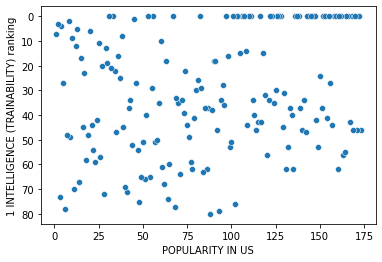

In [34]:
sns.scatterplot(x="POPULARITY IN US", y = "1 INTELLIGENCE (TRAINABILITY) ranking", data=best_clean)

In [35]:
x = best_clean["POPULARITY IN US"]
y = best_clean["LIFETIME COST, $"]

corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.503


<AxesSubplot:xlabel='POPULARITY IN US', ylabel='LIFETIME COST, $'>

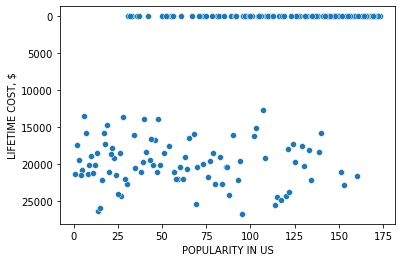

In [36]:
sns.scatterplot(x="POPULARITY IN US", y = "LIFETIME COST, $", data=best_clean)

In [37]:
x = best_clean["POPULARITY IN US"]
y = best_clean["NUM_LONGEVITY"]

corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.300


<AxesSubplot:xlabel='POPULARITY IN US', ylabel='NUM_LONGEVITY'>

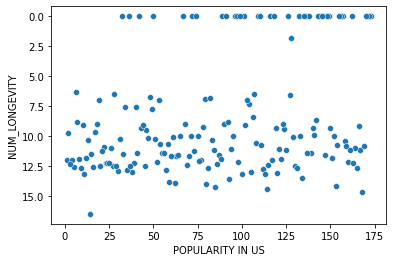

In [38]:
sns.scatterplot(x="POPULARITY IN US", y = "NUM_LONGEVITY", data=best_clean)

In [39]:
best_clean.sort_values(by=['category'], ascending=True)
best_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45.0,39,20143.0,48%,1.0,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80.0,61,22638.0,14%,30.0,70%,14.0,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30.0,30,22589.0,16%,19.0,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59.0,48,21992.0,22%,35.0,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130.0,81,20224.0,47%,31.0,69%,12.49,...,"3,478","13,064","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [40]:
categories = best_clean.groupby('category')

herding = categories.get_group("herding")

herding

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45.0,39,20143.0,48%,1.0,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
9,Australian Cattle Dog,herding,3.25,60.0,49,20395.0,43%,10.0,90%,11.67,...,"4,671","12,206","1,046",784.0,121,126.0,244.0,177.0,116.0,200
10,Shetland Sheepdog,herding,3.22,20.0,20,21006.0,34%,6.0,94%,12.53,...,"3,698","13,106","1,046",784.0,121,126.0,244.0,177.0,116.0,200
31,Australian Shepherd,herding,2.91,24.0,24,21458.0,28%,42.0,52%,12.28,...,"4,915","12,844","1,046",784.0,121,126.0,244.0,177.0,116.0,200
44,Briard,herding,2.71,125.0,79,19673.0,55%,30.0,70%,11.17,...,"4,471","11,683","1,046",784.0,121,126.0,244.0,177.0,116.0,200
50,Belgian Tervuren,herding,2.57,108.0,72,19132.0,61%,14.0,85%,10.6,...,"4,243","11,087","1,046",784.0,121,126.0,244.0,177.0,116.0,200
57,Bouvier des Flandres,herding,2.47,83.0,62,18959.0,64%,29.0,72%,10.34,...,"4,139","10,815","1,046",784.0,121,126.0,244.0,177.0,116.0,200
58,Pembroke Welsh Corgi,herding,2.45,25.0,25,23978.0,13%,11.0,89%,12.25,...,"6,026","12,813","1,046",784.0,121,126.0,244.0,177.0,116.0,200
69,German Shepherd,herding,2.06,2.0,2,17416.0,80%,3.0,98%,9.73,...,"3,895","10,177","1,046",784.0,121,126.0,244.0,177.0,116.0,200
71,Old English Sheepdog,herding,2.04,84.0,63,22611.0,15%,63.0,21%,11.19,...,"6,816","11,704","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [41]:
categories = best_clean.groupby('category')

hound = categories.get_group("hound")

hound

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
14,Dachshund,hound,3.19,9.0,9,20113.0,49%,49.0,37%,12.63,...,"3,517","13,210","1,046",784.0,121,126.0,244.0,177.0,116.0,200
18,Whippet,hound,3.11,57.0,46,20976.0,38%,51.0,34%,12.87,...,"3,584","13,461","1,046",784.0,121,126.0,244.0,177.0,116.0,200
34,Pharaoh Hound,hound,2.81,151.0,86,21047.0,33%,37.0,56%,11.83,...,"4,735","12,374","1,046",784.0,121,126.0,244.0,177.0,116.0,200
38,Beagle,hound,2.79,3.0,3,19468.0,59%,73.0,9%,12.3,...,"3,425","12,865","1,046",784.0,121,126.0,244.0,177.0,116.0,200
53,Basset Hound,hound,2.54,41.0,36,18328.0,74%,71.0,11%,11.43,...,"3,183","11,955","1,046",784.0,121,126.0,244.0,177.0,116.0,200
54,Basenji,hound,2.51,93.0,68,22096.0,18%,79.0,2%,13.58,...,"3,781","14,204","1,046",784.0,121,126.0,244.0,177.0,116.0,200
61,Saluki,hound,2.41,117.0,75,24866.0,7%,43.0,49%,12.0,...,"7,309","12,551","1,046",784.0,121,126.0,244.0,177.0,116.0,200
63,Greyhound,hound,2.29,140.0,85,15819.0,92%,46.0,43%,9.36,...,"2,606","9,790","1,046",784.0,121,126.0,244.0,177.0,116.0,200
67,Afghan Hound,hound,2.08,88.0,66,24077.0,11%,80.0,1%,11.92,...,"7,260","12,468","1,046",784.0,121,126.0,244.0,177.0,116.0,200
73,Rhodesian Ridgeback,hound,1.91,44.0,38,16530.0,85%,52.0,33%,9.1,...,"3,642","9,518","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [42]:
categories = best_clean.groupby('category')

non_sporting = categories.get_group("non-sporting")

non_sporting

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
12,Lhasa Apso,non-sporting,3.21,62.0,50,22031.0,21%,68.0,15%,13.92,...,"3,876","14,560","1,046",784.0,121,126.0,244.0,177.0,116.0,200
22,Poodle,non-sporting,3.04,8.0,8,21237.0,31%,2.0,99%,11.95,...,"4,783","12,499","1,046",784.0,121,126.0,244.0,177.0,116.0,200
23,Bichon Frise,non-sporting,3.03,39.0,34,19735.0,54%,45.0,45%,12.21,...,"3,400","12,771","1,046",784.0,121,126.0,244.0,177.0,116.0,200
26,Tibetan Spaniel,non-sporting,3.02,114.0,73,25549.0,5%,46.0,43%,14.42,...,"5,772","15,083","1,046",784.0,121,126.0,244.0,177.0,116.0,200
40,Tibetan Terrier,non-sporting,2.75,86.0,64,20336.0,44%,62.0,22%,12.31,...,"3,428","12,876","1,046",784.0,121,126.0,244.0,177.0,116.0,200
47,Boston Terrier,non-sporting,2.61,22.0,22,17741.0,77%,54.0,31%,10.92,...,"3,041","11,422","1,046",784.0,121,126.0,244.0,177.0,116.0,200
52,Dalmatian,non-sporting,2.57,73.0,57,19886.0,53%,39.0,55%,11.27,...,"4,511","11,788","1,046",784.0,121,126.0,244.0,177.0,116.0,200
74,French Bulldog,non-sporting,1.9,18.0,18,17266.0,82%,58.0,28%,9.0,...,"3,602","9,414","1,046",784.0,121,126.0,244.0,177.0,116.0,200
80,Chow Chow,non-sporting,1.76,68.0,54,15898.0,91%,77.0,5%,9.01,...,"3,606","9,424","1,046",784.0,121,126.0,244.0,177.0,116.0,200
87,Bulldog,non-sporting,0.99,6.0,6,13479.0,100%,78.0,3%,6.29,...,"2,518","6,579","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [43]:
categories = best_clean.groupby('category')

sporting = categories.get_group("sporting")

sporting

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
3,Brittany,sporting,3.54,30.0,30,22589.0,16%,19.0,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130.0,81,20224.0,47%,31.0,69%,12.49,...,"3,478","13,064","1,046",784.0,121,126.0,244.0,177.0,116.0,200
6,English Cocker Spaniel,sporting,3.33,63.0,51,18993.0,63%,18.0,82%,11.66,...,"3,247","12,196","1,046",784.0,121,126.0,244.0,177.0,116.0,200
7,Cocker Spaniel,sporting,3.3,27.0,27,24330.0,9%,20.0,79%,12.5,...,"6,149","13,074","1,046",784.0,121,126.0,244.0,177.0,116.0,200
19,English Springer Spaniel,sporting,3.09,29.0,29,21946.0,24%,13.0,86%,12.54,...,"5,019","13,116","1,046",784.0,121,126.0,244.0,177.0,116.0,200
24,German Shorthaired Pointer,sporting,3.03,15.0,15,25842.0,3%,17.0,84%,11.46,...,"8,117","11,987","1,046",784.0,121,126.0,244.0,177.0,116.0,200
25,Pointer,sporting,3.03,115.0,74,24445.0,8%,43.0,49%,12.42,...,"7,565","12,991","1,046",784.0,121,126.0,244.0,177.0,116.0,200
27,Labrador Retriever,sporting,2.97,1.0,1,21299.0,30%,7.0,93%,12.04,...,"4,819","12,593","1,046",784.0,121,126.0,244.0,177.0,116.0,200
33,Irish Setter,sporting,2.84,70.0,56,20323.0,45%,35.0,61%,11.63,...,"4,655","12,164","1,046",784.0,121,126.0,244.0,177.0,116.0,200
36,Golden Retriever,sporting,2.8,4.0,4,21447.0,29%,4.0,97%,12.04,...,"4,819","12,593","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [44]:
categories = best_clean.groupby('category')

terrier = categories.get_group("terrier")

terrier

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
2,Border Terrier,terrier,3.61,80.0,61,22638.0,14%,30.0,70%,14.0,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59.0,48,21992.0,22%,35.0,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200
15,Miniature Schnauzer,terrier,3.19,12.0,12,20087.0,51%,12.0,87%,11.81,...,"3,486","12,353","1,046",784.0,121,126.0,244.0,177.0,116.0,200
17,Australian Terrier,terrier,3.11,121.0,77,17892.0,76%,34.0,64%,11.05,...,"3,077","11,558","1,046",784.0,121,126.0,244.0,177.0,116.0,200
20,West Highland White Terrier,terrier,3.08,35.0,32,20490.0,41%,47.0,41%,12.8,...,"3,564","13,388","1,046",784.0,121,126.0,244.0,177.0,116.0,200
21,Bedlington Terrier,terrier,3.07,134.0,83,22107.0,17%,40.0,54%,13.51,...,"3,762","14,131","1,046",784.0,121,126.0,244.0,177.0,116.0,200
45,Norfolk Terrier,terrier,2.71,120.0,76,24308.0,10%,56.0,30%,13.07,...,"5,231","13,671","1,046",784.0,121,126.0,244.0,177.0,116.0,200
56,Staffordshire Bull Terrier,terrier,2.48,76.0,58,21650.0,25%,49.0,37%,12.05,...,"4,823","12,604","1,046",784.0,121,126.0,244.0,177.0,116.0,200
60,Dandie Dinmont Terrier,terrier,2.42,160.0,87,21633.0,26%,62.0,22%,12.17,...,"4,871","12,729","1,046",784.0,121,126.0,244.0,177.0,116.0,200
64,Scottish Terrier,terrier,2.27,54.0,45,17525.0,78%,65.0,18%,10.69,...,"2,977","11,181","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [45]:
categories = best_clean.groupby('category')

toy = categories.get_group("toy")

toy

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
8,Papillon,toy,3.26,38.0,33,21001.0,36%,8.0,92%,13.0,...,"3,620","13,597","1,046",784.0,121,126.0,244.0,177.0,116.0,200
13,Affenpinscher,toy,3.2,139.0,84,18333.0,72%,37.0,56%,11.42,...,"3,180","11,945","1,046",784.0,121,126.0,244.0,177.0,116.0,200
16,Chihuahua,toy,3.15,14.0,14,26250.0,2%,67.0,16%,16.5,...,"4,594","17,258","1,046",784.0,121,126.0,244.0,177.0,116.0,200
28,Maltese,toy,2.93,23.0,23,19084.0,62%,59.0,25%,12.25,...,"2,410","12,813","1,046",784.0,121,126.0,244.0,177.0,116.0,200
29,Pomeranian,toy,2.93,17.0,17,15792.0,93%,23.0,77%,9.67,...,"2,693","10,114","1,046",784.0,121,126.0,244.0,177.0,116.0,200
30,Shih Tzu,toy,2.93,11.0,11,21152.0,32%,70.0,13%,13.2,...,"3,675","13,806","1,046",784.0,121,126.0,244.0,177.0,116.0,200
32,Yorkshire Terrier,toy,2.85,5.0,5,20701.0,39%,27.0,75%,12.6,...,"3,508","13,179","1,046",784.0,121,126.0,244.0,177.0,116.0,200
35,Brussels Griffon,toy,2.8,77.0,59,19551.0,57%,59.0,25%,12.0,...,"3,341","12,551","1,046",784.0,121,126.0,244.0,177.0,116.0,200
43,Pug,toy,2.72,26.0,26,18527.0,68%,57.0,29%,11.0,...,"3,246","11,505","1,046",784.0,121,126.0,244.0,177.0,116.0,200
49,English Toy Spaniel,toy,2.59,129.0,80,17521.0,79%,45.0,45%,10.1,...,"2,981","10,564","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [46]:
categories = best_clean.groupby('category')

working = categories.get_group("working")

working

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,NUM_LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
11,Siberian Husky,working,3.22,16.0,16,22049.0,20%,45.0,45%,12.58,...,"5,035","13,158","1,046",784.0,121,126.0,244.0,177.0,116.0,200
37,Samoyed,working,2.8,69.0,55,25352.0,6%,33.0,68%,12.44,...,"7,577","13,012","1,046",784.0,121,126.0,244.0,177.0,116.0,200
48,Doberman Pinscher,working,2.59,13.0,13,18397.0,71%,5.0,95%,10.33,...,"4,135","10,805","1,046",784.0,121,126.0,244.0,177.0,116.0,200
62,Giant Schnauzer,working,2.38,95.0,70,26686.0,1%,28.0,74%,10.0,...,"9,838","10,459","1,046",784.0,121,126.0,244.0,177.0,116.0,200
65,Rottweiler,working,2.24,10.0,10,18886.0,66%,9.0,91%,9.11,...,"5,549","9,529","1,046",784.0,121,126.0,244.0,177.0,116.0,200
68,Newfoundland,working,2.07,43.0,37,19351.0,60%,34.0,64%,9.32,...,"5,677","9,748","1,046",784.0,121,126.0,244.0,177.0,116.0,200
72,Akita,working,1.95,47.0,41,20994.0,37%,54.0,31%,10.16,...,"6,188","10,627","1,046",784.0,121,126.0,244.0,177.0,116.0,200
76,Bernese Mountain Dog,working,1.85,34.0,31,16099.0,89%,22.0,78%,7.56,...,"4,605","7,907","1,046",784.0,121,126.0,244.0,177.0,116.0,200
78,Boxer,working,1.83,7.0,7,15746.0,94%,48.0,39%,8.81,...,"3,526","9,215","1,046",784.0,121,126.0,244.0,177.0,116.0,200
79,Alaskan Malamute,working,1.82,58.0,47,21986.0,23%,50.0,36%,10.67,...,"6,499","11,160","1,046",784.0,121,126.0,244.0,177.0,116.0,200
